# EXP.03 😹 고양이 수염 스티커 만들기!

* EXP를 처음 시작한 지도 벌써 2주! 이번 시간에는 OpenCV, dlib 를 이용해 사진에 왕관 스티커를 붙여보는 예제를 수행해 보았다. 오늘 배운 내용을 토대로 이번 프로젝트를 진행 해 보자.

----

# 목차 

# 1. 사진 준비하기

# 2. 얼굴 검출  랜드마크 검출 하기

# 3. 스티커 적용 위치 확인하기

# 4. 스티커 적용하기

# 5. 다른 시도 해 보기 - 얼굴 각도에 맞게 바뀌는 고양이 수염

# 6. 회고


----

# 1. 사진 준비하기


## 1-1. 사진 다운받기 


### 1-1-1. 스티커로 사용할 사진 (png)    
* 고양이 수염 스티커를 만들기로 했기 때문에, 수염 사진을 찾아 준비하였다.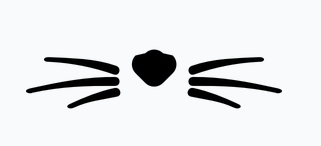     
> 다운 받은 사이트 -> [flaticon](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1) : 다양한 아이콘용 png / svg 파일을 무료로 다운로드 받을 수 있다. 하루에 다운 받을 수 있는 횟수가 정해져 있기 때문에, 여러 이미지를 받을 땐 구글링 을 하거나, 원하는 스티커용 png 파일을 다운 받아, 배경을 지워서 사용 해 줘야 한다.


### 1-1-2. 스티커를 붙일 사람 얼굴 사진
* 셀프 카메라를 즐겨하지 않는 사람이라, 좋은 방법이 없을까 하던 차, 초상권 걱정 없는 얼굴 사진이 있는 홈페이지가 있어, 그쪽을 활용하기로 하였다.
* 다채로운 각도는 없어, 멀리서 찍힌 사진 등은 인터넷에서 추가로 찾아야 했다. 
 

> [100K Faces Project](https://generated.photos/)  
Generated Photos 에서 추진한 프로젝트. 
2년간 69명의 모델을 촬영한 29,000장의 사진을 바탕으로 인공지능이 만든 가상의 인물사진.
사진을 다운로드 받을 수도 있고, face generator로 직접 얼굴을 만들어 볼 수 있다.   
(출처 : https://goodsnote.tistory.com/22)


> [This Person Does Not Exist](https://thispersondoesnotexist.com/)
Nvidia의 소프트웨어 개발자가 오픈소스로 공개한 GAN(Generative adversarial network) 기술에 기반한 인공지능으로 합성된 가짜얼굴을 보여주는 홈페이지.
새로고침할 때마다 새로운 얼굴 이미지를 생성한다. 간혹 버그 처럼 보여줄 때도 있다고..  
(출처 : https://bioinformaticsandme.tistory.com/272 ) 


> [pixabay](https://pixabay.com/ko/)  
이미지 및 동영상 공유 사이트. 원하는 이미지를 검색해 다운로드 받을 수 있는데, 다운 받을 때 사진 사이즈를 선택해 다운 받을 수 있었다. 


## 1-2 사진 가져오기 
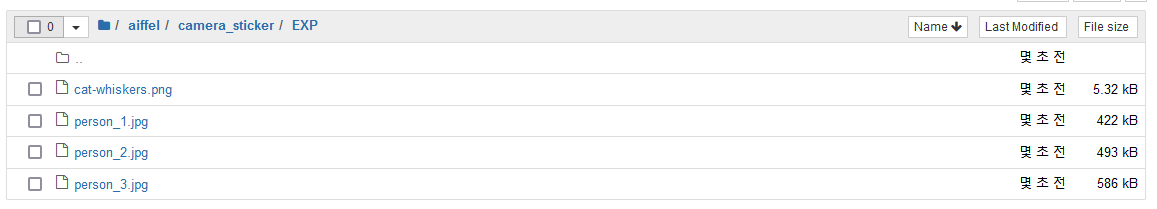  
* 예제 시간에 만든 폴더 안에, 프로젝트용 폴더 (FUN)을 만들어, 그 안에 준비한 사진을 넣었다. 제대로 들어왔는지, 이미지를 읽어와 보자!

* 읽어오기 전에 먼저, 필요한 모듈을 가져와준다. 

In [193]:
# 필요한 모듈 가져오기
import os
import cv2 #opencv 이미지 처리를 위한 모듈 
import matplotlib.pyplot as plt # 이미지를 출력하기 위한 모듈
import numpy as np
import dlib #얼굴 검출 및 탐색 기능 

print('필요한 모듈 가져오기 성공~🛸')

필요한 모듈 가져오기 성공~🛸


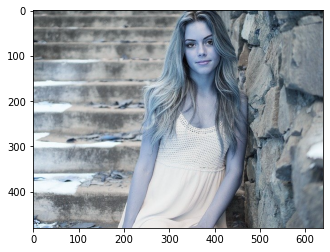

In [194]:
# 이미지 읽어오기 
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/EXP/woman_1.jpg'
img_bgr = cv2.imread(my_image_path,-1) # OpenCV로 이미지를 불러옴
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()


* OpenCV는 BGR(파랑,녹색,빨강)의 이미지 채널을 사용하고 있기 때문에,불러오기 전에 RGB로 변환 해 주는 과정을 거쳐야 한다. 

<function matplotlib.pyplot.show(close=None, block=None)>

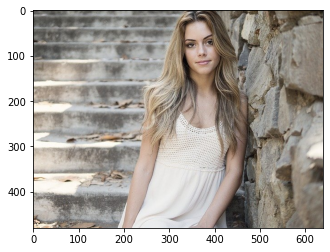

In [195]:
# RGB 보정처리! 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show

# 2. 얼굴 검출 & 랜드마크 검출 하기

## 2-1 얼굴 검출하기 

* Object detection 기술을 이용해 얼굴의 위치를 찾습니다. 
* bounding box를 찾은 후, 얼굴 랜드마크를 찍는 과정을 거칩니다.
  다음 스텝에서 스티커의 위치를 잡는데 사용합니다. 

### 2-1-1 hog detector 선언 

In [196]:
detector_hog = dlib.get_frontal_face_detector()
print("hog detector detected! 🛸")

hog detector detected! 🛸


### 2-1-2 선언한 detector를 이용해 얼굴의 bounding box를 추출! 

In [197]:
# 위에서 rgb 로 바꿔준 변수를 가져와 활용합니다. 
dlib_rects = detector_hog(img_rgb, 1) #1= 이미지 피라미드 수 
print('bounding box가 감지되었습니다! 🛸 ')

bounding box가 감지되었습니다! 🛸 


### 2-1-3 bounding box 확인해보기 
* 위에서 선언하고 추출한 부분이 잘 적용되었나 확인 해 봅시다! 

rectangles[[(325, 46) (414, 136)]]


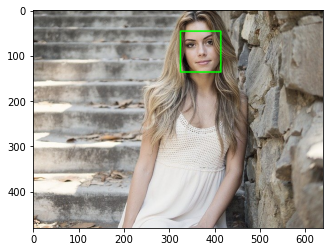

In [198]:
print(dlib_rects)

for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* 녹색 박스가 제대로 출력 됬다! 이제 다음 스텝으로 넘어가자. 
----

# 3. 스티커 적용 위치 확인하기
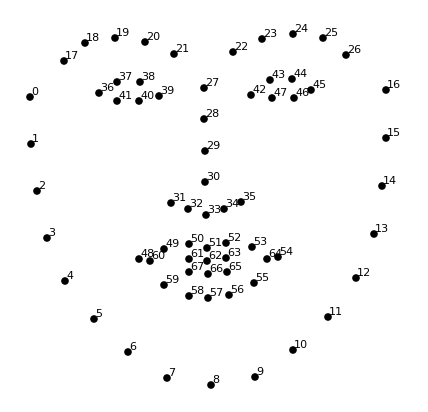  

    1. 얼굴에 랜드마크(위 사진)를 적용해 확인 해보고
    2. 고양이 수염을 붙일 적당한 위치를 찾아보자.



## 3-1 얼굴에 랜드마크 찍어보기! 


### 3-1-1 weight file 다운로드 

In [199]:
# 예제 파일 하면서 다운 받은 부분이지만, 이후를 위해 적어둡니다.
# 경로 변경 후 주석풀고 cms에서 사용하면 ok! 
#dlib의 weight file 다운로드. (압축파일 확장자 : bz2) & 압축 해제 
# wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [200]:
# 지정한 landmark 모델 불러오기 
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("landmark 모델이 도착했어요! 🛸")

landmark 모델이 도착했어요! 🛸


### 3-1-2 얼굴 영역 박스 마다 face landmark 찾아내기.

In [201]:
list_landmarks = []

for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect) # dlib.full_object_detection 의 객체  
        #face landmark 좌표를 저장해 둡니다.
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### 3-1-3 찾아낸 landmark를 출력하기 

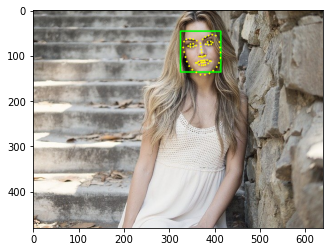

In [202]:
for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3-2 스티커를 붙일 위치 찾기 - 좌표! 

* 우리가 붙일 고양이 수염은 예제에서 했던 왕관 위치와는 다른 곳에 붙여 줘야 한다. 
* 수염이니까.. 코의 완전 끝 보다 살짝 안쪽에 찍어줘야 이쁠 것 같다! 


### 3-2-1 좌표값 찾기 
* 스티커를 구현할 때 중요한 얼굴위치! 
* 어떤 조건에도 굴하지 않고 이쁜 고양이 수염을 붙혀주기 위해선, 이미지 마다 다른 크기로 고양이 수염이 붙어줘야 한다. ==> 스티커 위치와 스티커 크기를 계산 해 줘야겠지?
* 계산 해 주기 위해선 우선, 우리가 붙이려 하는 곳의 좌표값을 알아야 한다.


In [203]:
# 코의 중심 좌표를 찾아보자!
# 코의 살짝 윗부분에 붙여주고 싶어서, 30번을 좌표값으로 삼았다. 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print (landmark[30]) 
        x = landmark[30][0]
        y = landmark[30][1] 
        w = h = dlib_rect.width()
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))

(372, 93)
(x,y) : (372,93)
(w,h) : (90,90)


* 코의 중심점 위치는 (372, 93) 이다!  

### 3-2-2 스티커 이미지 조절하기 

* 우선 스티커 이미지를 불러온 다음,
* 지금 사진에 어울리는 크기로 스티커 크기를 조절해 줘야 합니다! 

In [204]:
# 스티커 이미지 불러오기 
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/EXP/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) #스티커 이미지를 불러옵니다.
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(90, 90, 3)


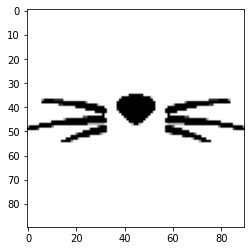

In [205]:
plt.imshow(img_sticker)
plt.show()

* 스티커가 붙을 위치 = (371, 87) (중심점 기준)
* 스티커의 크기 resize = 90,90 == bounding box 크기 
* 스티커를 바운딩 박스 부분의 이미지위에 붙여주는것 
* 좌표값을 바꿔주지 않으면, 스티커 사진의 0,0 부분이 코 중심점으로 붙어, 엉뚱한 부분에 붙게 되는 것
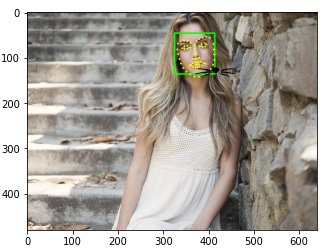


* 그렇기 때문에 좌표의 resize 작업은 꼭 필요하다. 

### 3-2-3 좌표 값 resize 

* 어떤 상황인지 이해 해 보기 위해, 임의의 bounding box를 그려보았다.
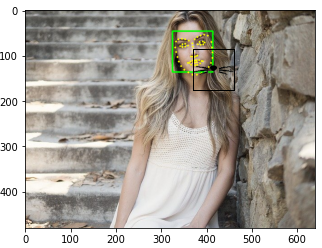  

* 사진과 같은 상황이기 때문에, 스티커 사진의 0점이 붙을 위치를 지정해 줘야한다.


1. x 좌표값 
    * 왼쪽으로 스티커 사진의 반만큼 움직여야하기때문에, 
    => x - (w/2)
    
    
2. y 좌표값 
    * 위쪽으로 스티커사진의 반 만큼 위로 올라가야한다
    => y - (h/2)

In [206]:
# 스티커 이미지를 3-2-1 단계에서 구한 크기로 RESIZE 해 줍니다. 
# 예제에선 머리 위에 올리는것이였지만, 우리는 코에 붙여야한다. y 좌표값은 코의 중심점이 되야함. 
# slice indices must be integers or None or have an __index__ method 
# 라는 오류값을 보고 좌표값을 int로 감싸주었다 
refined_x = int(x - w/2)
refined_y = int(y - h/2) 
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (327,48)


In [207]:
# 조정한 좌표값 x 나 y 가 음수일 경우, 0으로 재 조정해주는 코드 
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (327,48)


In [208]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


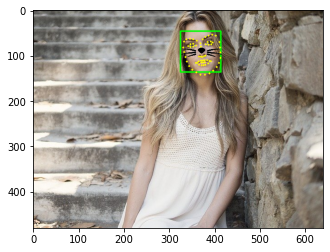

In [209]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

* 스티커 기본 기능 완성~! 
----



# 4. 스티커 적용하기

* 스티커 위치가 잘 적용 됬으니, 불필요한 bounding box와 landmark를 제거하고. 최종 결과만 출력해봅시다! 
* 스티커를 조금 더 자연스럽게 보이기 위해, 원본 이미지가 같이 보이도록 만들어 봅시다! 

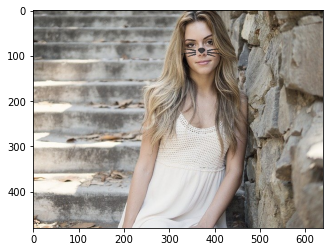

In [210]:
#스티커를 적용 해 봅시다. 
# 조금 더 자연스러워 보이기 위해, addWeighted 를 이용해서 스티커 뒤 원본 이미지가 같이 보이게 하였다. 
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, cv2.addWeighted(img_sticker, 0.7, sticker_area, 0.3, 0)).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

----




# 5. 다른 시도 해 보기

* 스티커의 기본 기능은 됬지만, 아직 스티커로는 부족한 점이 많다. 
* 일단 지금 위 사진만해도, 뭔가.. 좀 부자연스럽다..  

### 위 사진의 문제점 
* 얼굴이 정면이 아니라, 살짝 왼쪽으로 기울어진 사진이기 때문에 수염 위치와 얼굴이 맞지 않는다. 
* 얼굴 각도가 바뀔 때 마다, 스티커의 각도도 바껴야한다. 

## 5-1. 다른 사진에도 적용해 보기 - 정면사진

* 우선, 다른 이미지에도 스티커 적용이 잘 되는지 확인 해 보자. 

<function matplotlib.pyplot.show(close=None, block=None)>

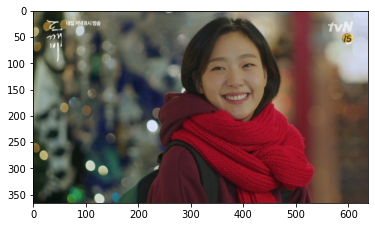

In [211]:
# 이미지 읽어오고 rgb 변환
sec_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/EXP/kge_1.jpg'
sec_img_bgr = cv2.imread(sec_image_path,-1) # OpenCV로 이미지를 불러옴
sec_img_show = sec_img_bgr.copy()
sec_img_rgb = cv2.cvtColor(sec_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(sec_img_rgb)
plt.show

rectangles[[(330, 80) (438, 187)]]


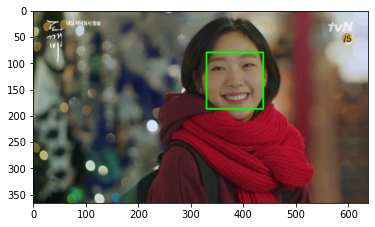

In [212]:
# bounding box 추출, 확인
sec_dlib_rects = detector_hog(sec_img_rgb, 1)

print(sec_dlib_rects)

for sec_dlib_rect in sec_dlib_rects:
        l = sec_dlib_rect.left()
        t = sec_dlib_rect.top()
        r = sec_dlib_rect.right()
        b = sec_dlib_rect.bottom()

        cv2.rectangle(sec_img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        
secimg_show_rgb = cv2.cvtColor(sec_img_show, cv2.COLOR_BGR2RGB)        
plt.imshow(secimg_show_rgb)
plt.show()

랜드마크 갯수 :  68


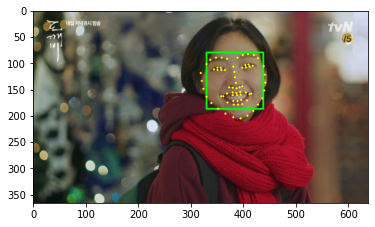

In [213]:
# landmark 찾고, 출력하기
# landmark 찾기
sec_list_landmarks = []

for dlib_rect in sec_dlib_rects:
        points = landmark_predictor(sec_img_rgb, dlib_rect) # dlib.full_object_detection 의 객체  
        #face landmark 좌표를 저장해 둡니다.
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        sec_list_landmarks.append(list_points)

print('랜드마크 갯수 : ',len(sec_list_landmarks[0]))

# landmark 출력

for landmark in sec_list_landmarks:
        for point in landmark:
            cv2.circle(sec_img_show, point, 2, (0, 255, 255), -1)

secimg_show_rgb = cv2.cvtColor(sec_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(secimg_show_rgb)
plt.show()


In [214]:
# 좌표값을 찾고 
for dlib_rect, landmark in zip(sec_dlib_rects, sec_list_landmarks):
        print (landmark[30]) 
        x = landmark[30][0]
        y = landmark[30][1] 
        w = h = dlib_rect.width()
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))

(386, 138)
(x,y) : (386,138)
(w,h) : (109,109)


In [215]:
# 스티커 이미지 resize 
img_sticker = cv2.resize(img_sticker, (w,h))

# 좌표값 resize
refined_x = int(x - w/2)
refined_y = int(y - h/2) 

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


(x,y) : (331,83)


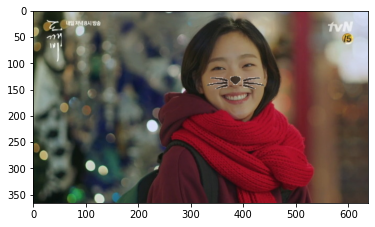

In [216]:
# 스티커 붙여보기 
sticker_area = sec_img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sec_img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, cv2.addWeighted(img_sticker, 0.6, sticker_area, 0.4, 0)).astype(np.uint8)
plt.imshow(cv2.cvtColor(sec_img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

----

# 6. 갑자기 분위기 회고 💀

* 여기서 조금 더 시도를 해서 완성하고 싶었으나, 다른 노드를 더 완성하고 싶어 일단 여기서 손을 놓으려 한다.  


* 인터넷에서 기능에 대해 찾아보고, 수식을 적용하여 값을 구해 스티커의 각도를 조정하거나, 여러 사람에게 같은 스티커를, 각도에 맞게 적용하는 등 여러가지 시도를 해 볼 수 있었겠지만.. 위의 코드도 확실하게 이해 되지 않은 상태에서, 다른 코드를 가져와 복사 붙여넣기 한다는건 음식을 내야할 시간은 다가오는데, 최고의 맛을 잡을 수 없어 국에 간장만 들이 붓는것과 같은게 아닐까 하는 생각이 들었다. 


* 분명 시도를 해 봤다면, 내 학습에도 도움이 됬을테고, 유용한 과제였겠지만, 그것만을 바라보고 찾아보기엔 시간이 너무나도 부족했다. 


* 그래서 해보고 싶었던 시도를 적어보는 것으로 이번 과제를 마치려 한다.

## 6-1 고양이 수염, 얼굴 각도에 따라 이동할 순 없을까? 
 
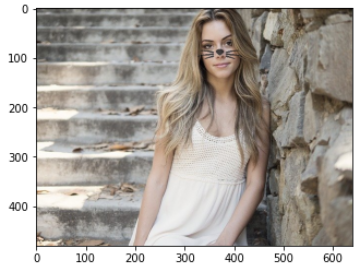 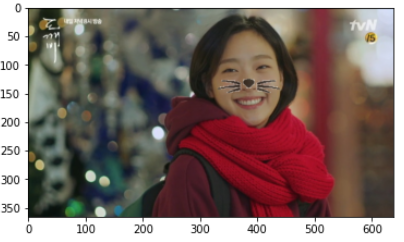

* 첫번째, 두번째 사진 모두 완벽한 정면 사진이 아닌지라 붙이긴 붙여도 부자연스러워 보인다. 
* 얼굴 각도에 맞게 고양이 수염이 움직인다면 조금 더 자연스러운 고양이 스티커가 될 것같다. 

### 내가 생각하는 해결 방법 

* 코를 중심점으로, 얼굴 각도에 따른 각도를 알아야 사진도 구한 각도 만큼 틀어줄 수 있을 것이다.  

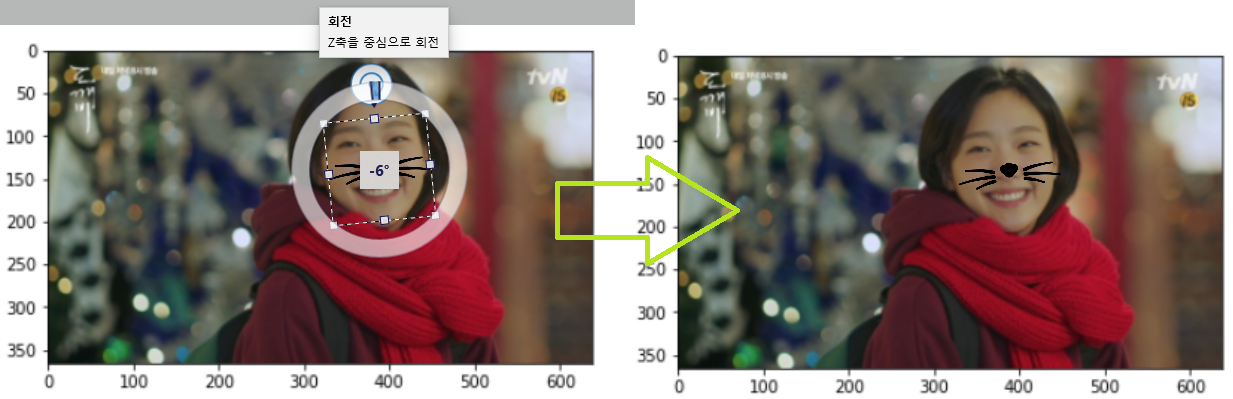
 ~~3D 그림판에서 편집하는 것 처럼만 되도 엄청 편할텐데~~
 

* 위 사진처럼 우리가 눈대중으로 봤을때, 얼마나 어울리는지의 각도를 컴퓨터는 모르기때문에, 각도 값을 알려주고 그 값만큼 회전하라고 해 줘야한다.


* 하지만 다른 사진을 넣을 때마다 값을 일일이 바꿔준다면, 그건 좋은 모델이 아닐것이다. 편의성에서 부터 out! 이라 생각한다. => 함수로 기능을 정의하고, 입력값만 받아서 동작하게끔 한다면 그걸 바탕으로 여러가지 시도를 해 볼 수 있었을것이다. 


* 다른 팀원분께 들은 해결 방법은, 코의 landmark 좌표를 기준으로, 얼굴 윤곽부분의 landmark 와의 세타각을 구해 적용하면된다! 였는데, 우선 세타각을 구하려면 피타고라스의 정의를 알아야했고, 그 부분을 코드로 적용하여 각도 값을 좌표에 반영해 주면 얼굴이 기울어진 각도 만큼 스티커도 같이 기울어, 좀 더 자연스러운 얼굴 인식 스티커가 됬을 것이다.  

# 6-2 고양이 수염이 붙었으면 머리엔 귀도 있어야 하는거 아닌가? 

* 스X우 스티커 앱으로 고양이 스티커를 적용 해보면 
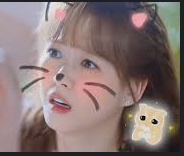
 위 이미지처럼 수염 외에도 고양이 귀가 함께 나타나 적용된다.
 
 
* 귀 부분 이미지도 결국 고양이 수염과 같은 방식으로 작용 될 것이므로,
스티커 이미지를 resize 하고, 좌표값을 설정해 주고, 얼굴 방향이 다르더라도 원하는 위치에 적용할 수 있지 않았을까? 
 

## 6-3 사진 안에 모든 사람에게 적용되는 고양이 수염

* 실제로 우수의 전당에 오른 분들은 꼭 빠짐없이 적용하셨던 부분이고, 다른 팀원 분들이 시도해 보셨을 때 많이 어렵다 하셨던 부분이다. 


* 한 부분만 시도하면 됬던 첫 부분과는 다르게, 사진 안에 있는 모든 사람 얼굴을 인식하고, 얼굴마다 크기가 다르다면, 그에 맞는 크기로 resize 되야 할 것이고, 얼굴 각도가 다르다면, 각도도 적용되야 한다.


* 6-1의 코드가 완성 됬다면, 위의 부분과 합쳐서, 반복문을 이용해 모든 얼굴 부분에 적용 해 줄 수 있었을 것이다.

## 6-4 이번 프로젝트를 진행하면서..

=>&nbsp;이번 프로젝트 노드를 진행하면서, 가끔 사용하는 스티커 앱이 어떤식으로 실행되는지, 어떤 방식으로 우리 사진에 적용되는지를 알 수 있었다. 앞으로 배울 OpenCV의 기능을 배워 나간다면, 이번시간에 한 고양이 수염 스티커 보다 더 성능이 좋은 얼굴 인식 스티커를 만들수 있지 않을까!  

=>&nbsp;또한, 6-1~3 부분을 시도하지 못 하고 제출하게 된 점이 가장 아쉬웠다. 과제를 조금 더 세분화 해서, 작은 것 부터 하나하나 진행 해 보고, 정리에만 너무 공을 들이지 않았더라면 적어도 해 보고 싶었던 것 한가지는 시도 해 볼 수 있지 않았을까? 
&nbsp;&nbsp;정확히 알고 넘어가려는 마음도, 가독성을 좋게 하려고 정리를 열심히 하려는 마음도 중요하지만, 빠르게 처리해야 할 부분은 빠르게 처리 할 수 있는 방향으로 바꿔서 일을 마무리 해야한다는 점을 뼈저리게 느꼈다. 회사에서 일을 할 때도, 한가지 주제에만 매달려 있으면, 나에게 오는 여럿 일을 처리하지 않아 다른 사람이 피해를 보는것 처럼. 

=>&nbsp; 그리고 앞으론 내가 직접 그림판을 열어서 이미지를 편집하거나, 파일 이름을 일일이 복사+붙여넣기를 하는것이 아닌, 코드로 해결 해 보려는 노력을 해야할 것같다. 내가 아는 지식만으로 해결하는 습관이 있다보니, 다른 방법을 찾아 적용 해 보고, 연습해  보려하지 않는 경향이 있는것 같다. 찾아보고 시도 해 보면, 내가 아는 방법, 내가 했던 방법 보다 더 쉬운 방법도 있을텐데.. 그리고 코딩 연습도 될 것이고.. 사실 이것저것 생각이 들었던 것도 코딩으로 무언가를 시도해 보려는 습관이 덜 들어서 지레겁먹고 못할것이라고만 생각했던 부분도 반성해야할 부분이라 생각한다. 뭐든 해 봐야 느는법 이란걸 알았으니, 앞으론 파이썬 기초 코딩을 많이 이용해서 비 효율적인 면을 효율적으로 고쳐나가고 싶다. 정말 그림판을 열어서 해결해야하는 부분도 있겠지만, 그렇지 않은 부분에는 코딩을 써서 멋있게 해결 해나가고 싶다. 